# PiML Toolbox: High-code Demo for TaiwanCredit Data

This example notebook demonstrates how to use PiML with its high-code APIs for the TaiwanCredit data from UCI repository, which consists of 30,000 credit card clients in Taiwan from 200504 to 200509; see details [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). The data can be loaded from PiML and it is subject to slight preprocessing. 

The response `FlagDefault` is binary and it is a classification problem.

# Stage 0: Install PiML package on Google Colab

1. Run `!pip install piml` to install the latest version of PiML. It requires V0.2 or above to use high-code APIs.
2. In Colab, you'll need restart the runtime in order to use newly installed PiML version.

In [ ]:
!pip install piml

# Stage 1: Initialize an experiment, Load and Prepare data

In [1]:
from piml import Experiment
exp = Experiment()

In [2]:
exp.data_loader(data='TaiwanCredit')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FlagDefault
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,2.838849,0.000000,0.000000,0.000000,0.000000,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3.514946,3.538574,3.513484,0.000000,3.000434,3.000434,3.000434,0.000000,3.301247,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,4.156307,4.174612,4.191730,3.181558,3.176381,3.000434,3.000434,3.000434,3.699057,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,4.452017,4.461799,4.470528,3.301247,3.305351,3.079543,3.041787,3.029384,3.000434,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,4.320997,4.282101,4.281760,3.301247,4.564453,4.000043,3.954291,2.838849,2.832509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,4.944508,4.494683,4.203604,3.929470,4.301052,3.699317,3.484015,3.699057,3.000434,0.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,3.953276,3.715251,0.000000,3.264345,3.547405,3.954194,2.113943,0.000000,0.000000,0.0
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,4.319710,4.313509,4.286860,0.000000,0.000000,4.342443,3.623353,3.301247,3.491502,1.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,4.722428,4.073938,4.689708,4.933998,3.532754,3.071514,3.284882,4.723989,3.256477,1.0


In [3]:
# Use only payment history attributes: Pay_1~6, BILL_AMT1~6 and PAY_AMT1~6 (i.e., exclude all others); Keep the response `FlagDefault`
exp.data_summary(feature_exclude=["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"], feature_type={})

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='Data Shape:(30000, 24)')

In [4]:
exp.data_prepare(target='FlagDefault', task_type='Classification', test_ratio=0.2, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Output()

,0,1
0,Inactive columns name,"[LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE]"
1,Target colunm name,FlagDefault
2,Task type,Classification
3,Test ratio,0.2
4,Random state,0


In [5]:
exp.eda(show='all', uni_feature='BILL_AMT1', bi_features=['PAY_1', 'PAY_AMT1'],  multi_type='correlation_heatmap')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Stage 2. Train intepretable models 

In [6]:
## ReLU-DNN: ReLU Deep Neural Networks with L1-Regularization, e.g. L1_reg = 0.0008
from piml.models import ReluDNNClassifier

clf1 = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf1, name='ReLU-DNN')
exp.model_diagnose(model="ReLU-DNN", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register ReLU-DNN Done</p>")

,,ACC,AUC,Recall,Precision,F1
0,Train,0.818792,0.762730,0.365612,0.66987,0.473040
1,Test,0.828167,0.766346,0.372398,0.69000,0.483726
2,Gap,0.009375,0.003616,0.006786,0.02013,0.010685


In [7]:
## GAMI-Net: GAM-Neural Networks with Structured Interactions
from piml.models import GAMINetClassifier

clf2 = GAMINetClassifier(interact_num=10, loss_threshold=0.01,  
                        subnet_size_main_effect=[20], 
                        subnet_size_interaction=[20,20])
exp.model_train(model=clf2, name='GAMI-Net')
exp.model_diagnose(model="GAMI-Net", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register GAMI-Net Done</p>")

,,ACC,AUC,Recall,Precision,F1
0,Train,0.816542,0.772853,0.331523,0.679724,0.445675
1,Test,0.823333,0.768074,0.335389,0.687204,0.450777
2,Gap,0.006792,-0.004779,0.003867,0.007480,0.005102


In [8]:
## EBM: Explainable Boosting Machine from MS Research
from piml.models import ExplainableBoostingClassifier

clf3 = ExplainableBoostingClassifier(interactions=10, random_state=0)
exp.model_train(model=clf3, name='EBM')
exp.model_diagnose(model="EBM", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register EBM Done</p>")

,,ACC,AUC,Recall,Precision,F1
0,Train,0.821833,0.788536,0.368046,0.685385,0.478918
1,Test,0.828000,0.776408,0.371627,0.689557,0.482966
2,Gap,0.006167,-0.012128,0.003580,0.004171,0.004048


In [9]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='accuracy')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Stage 3. Explain and Interpret

## Post-hoc Explaination: Global and Local Methods

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

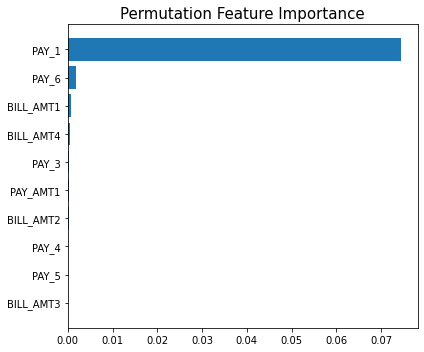

In [10]:
exp.model_explain(model='ReLU-DNN', show='global_pfi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

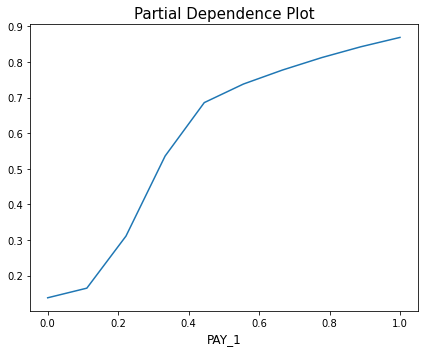

In [11]:
exp.model_explain(model='ReLU-DNN', show='global_pdp', uni_feature='PAY_1', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

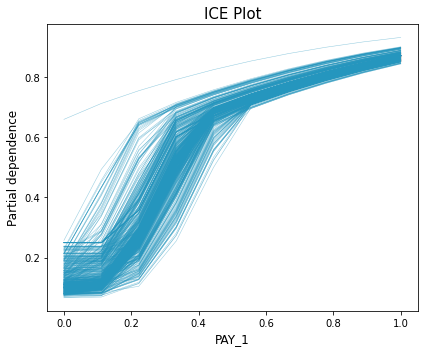

In [12]:
exp.model_explain(model='ReLU-DNN', show='global_ice', uni_feature="PAY_1", figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

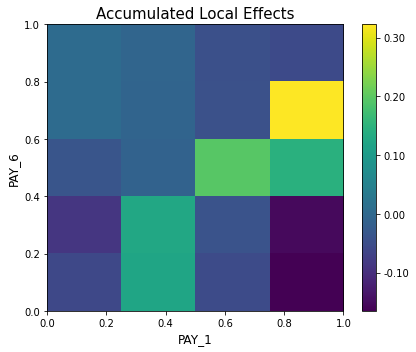

In [13]:
exp.model_explain(model='ReLU-DNN', show='global_ale', bi_features=['PAY_1', 'PAY_6'], figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

  0%|          | 0/50 [00:00<?, ?it/s]

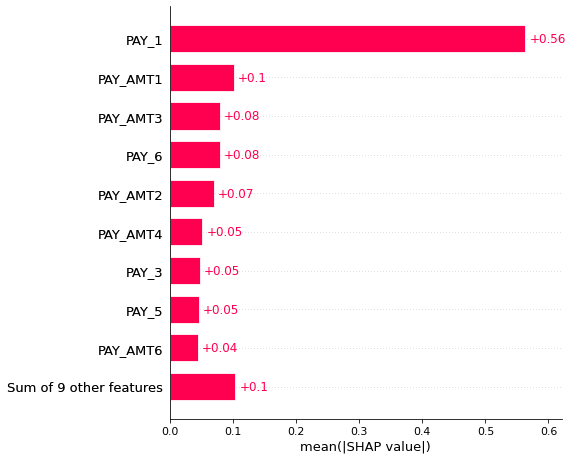

In [14]:
exp.model_explain(model='ReLU-DNN', show='global_shap_fi', sample_size=50)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

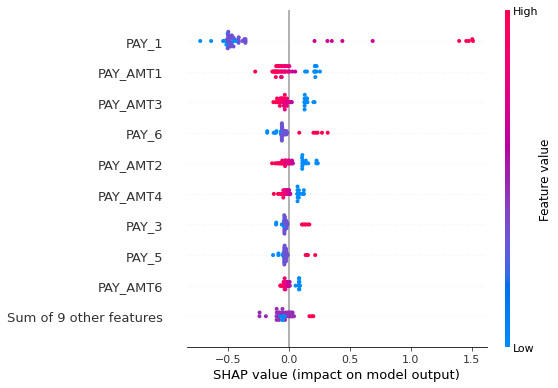

In [15]:
exp.model_explain(model='ReLU-DNN', show='global_shap_summary', 
                  sample_size=50)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

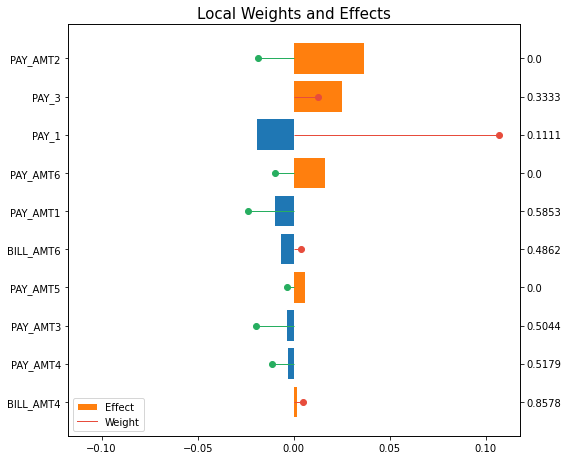

In [16]:
exp.model_explain(model='ReLU-DNN', show='local_lime', sample_id=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

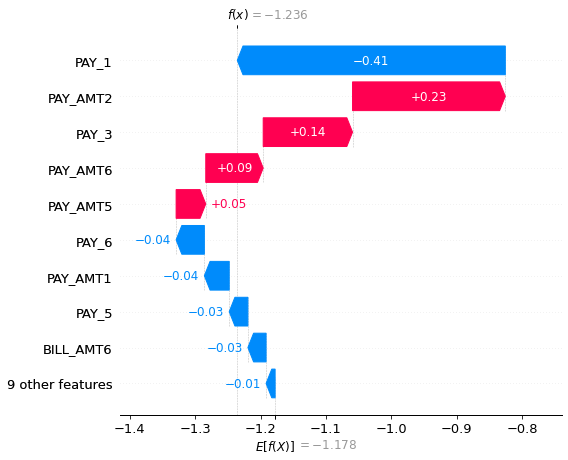

In [17]:
exp.model_explain(model='ReLU-DNN', show='local_shap', sample_id=0)

## Inherent Interpretation: Global and Local Methods

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

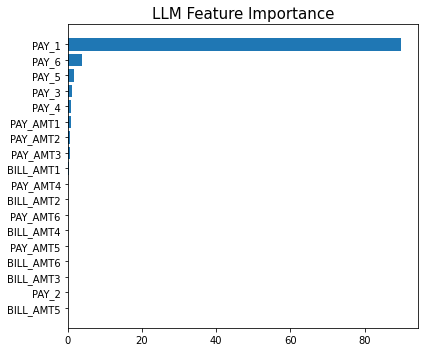

In [18]:
exp.model_interpret(model='ReLU-DNN', show='global_fi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

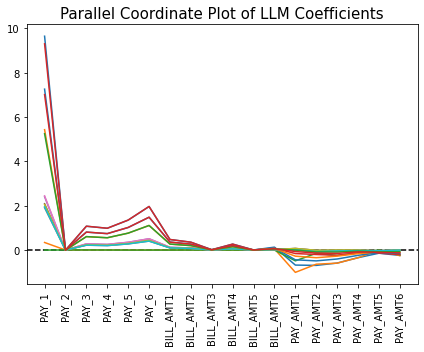

In [19]:
exp.model_interpret(model='ReLU-DNN', show='llm_pc', figsize=(6,5))

In [20]:
exp.model_interpret(model='ReLU-DNN', show='llm_summary', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,Count,Response Mean,Response Std,Local AUC,Global AUC
0,11027.0,0.165775,0.371895,0.719333,0.730515
1,6183.0,0.124858,0.330585,0.619568,0.668548
2,2563.0,0.214982,0.410890,0.545557,0.646519
3,2252.0,0.357460,0.479358,0.632787,0.720683
4,638.0,0.634796,0.481865,0.535633,0.700230
5,341.0,0.765396,0.424374,0.461063,0.712967
6,280.0,0.710714,0.454243,0.584962,0.713015
7,272.0,0.705882,0.456485,0.446257,0.698555
8,266.0,0.763158,0.425946,0.503910,0.698563
9,48.0,0.708333,0.459340,0.596639,0.713867


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

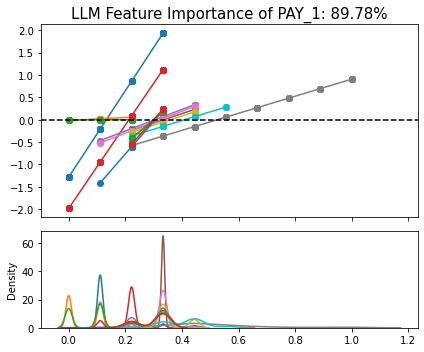

In [21]:
exp.model_interpret(model='ReLU-DNN', show='global_effect_plot', uni_feature='PAY_1', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

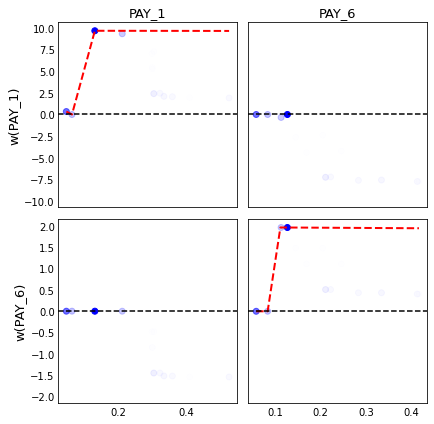

In [22]:
exp.model_interpret(model='ReLU-DNN', show='global_effect_plot', 
                    bi_features=['PAY_1', 'PAY_6'], figsize=(6,6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

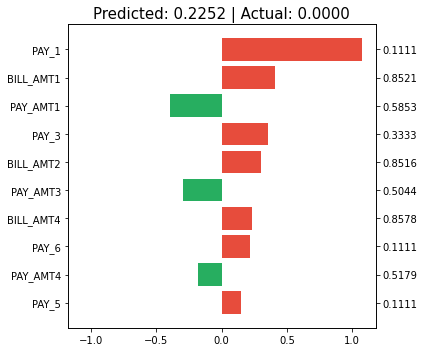

In [23]:
exp.model_interpret(model='ReLU-DNN', show='local_fi', sample_id=0, figsize=(6,5))

# Stage 4. Diagnose and Compare

In [24]:
exp.model_diagnose(model='ReLU-DNN', show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,,ACC,AUC,Recall,Precision,F1
0,Train,0.818792,0.762730,0.365612,0.66987,0.473040
1,Test,0.828167,0.766346,0.372398,0.69000,0.483726
2,Gap,0.009375,0.003616,0.006786,0.02013,0.010685


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

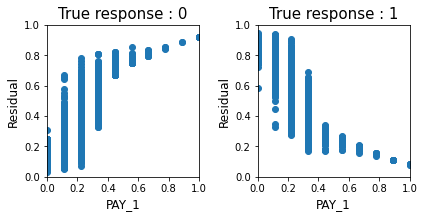

In [25]:
exp.model_diagnose(model='ReLU-DNN', show='accuracy_residual', target_feature='PAY_1', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

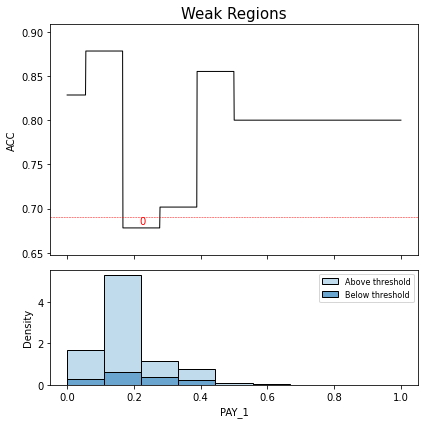

In [26]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot_plot', slice_features=['PAY_1'], 
                   slice_method='tree', threshold=1.2, min_sample=20, figsize=(6, 6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

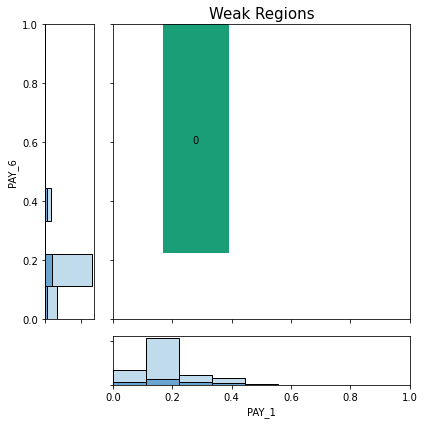

In [27]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot_plot', slice_features=['PAY_1', 'PAY_6'], 
                   slice_method='tree', threshold=1.2, min_sample=20, figsize=(6, 6))

In [28]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot_result', slice_features=['PAY_1', 'PAY_6'], 
                   slice_method='tree', threshold=1.2, min_sample=20)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Weak Regions cut-off at test ACC: 0.69014


,[PAY_1,PAY_1),[PAY_6,PAY_6),#Test,#Train,test_ACC,train_ACC,Gap
0,0.166667,0.388889,0.222222,1.0,305,1329,0.639344,0.697517,-0.058173


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

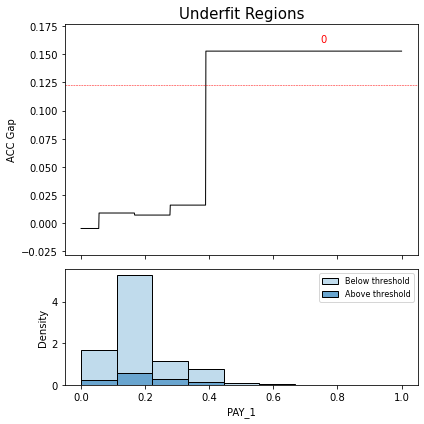

In [44]:
exp.model_diagnose(model='ReLU-DNN', show='underfit_plot', slice_features=['PAY_1'], 
                   slice_method='tree', threshold=1.15, min_sample=10, figsize=(6, 6))

In [30]:
exp.model_diagnose(model='ReLU-DNN', show='robustness', perturb_features='All Features', 
                   step=0.01, alpha=0.2, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [31]:
exp.model_diagnose(model='ReLU-DNN', show='resilience', immu_feature='None', 
                   target_feature='PAY_1', alpha=0.1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Box(children=(HBox(children=(Box(children=(VBox(children=(Output(), Output())),), layout=Layout(width='36%')),…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

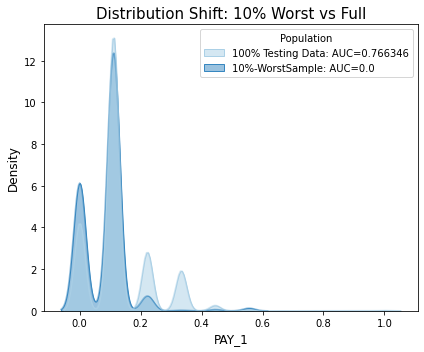

In [32]:
exp.model_diagnose(model='ReLU-DNN', show='resilience_shift_density', immu_feature='None', 
                   target_feature='PAY_1', alpha=0.1, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

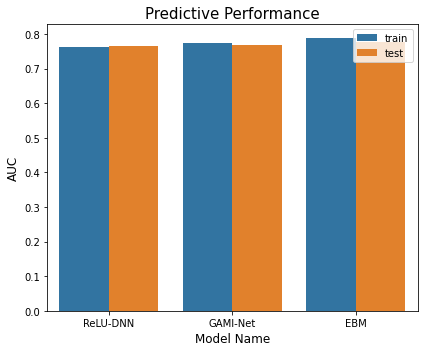

In [33]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='accuracy_auc', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

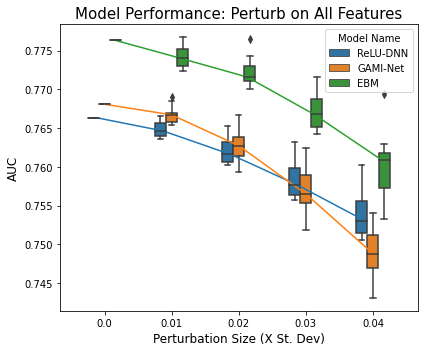

In [34]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf', 
                  step=0.01, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

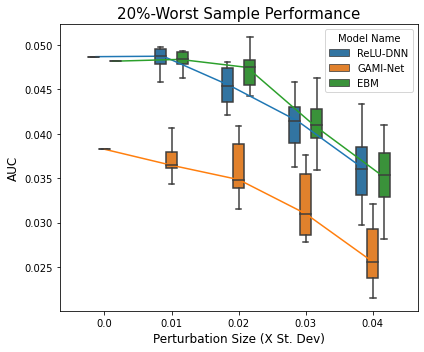

In [35]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf_worst', 
                  step=0.01, alpha=0.2, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

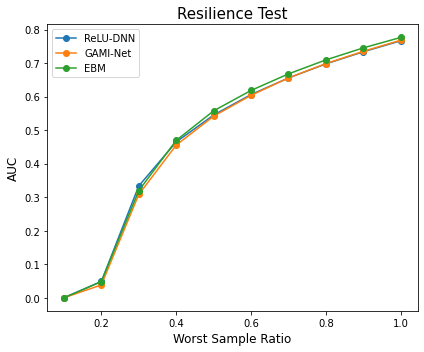

In [36]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_perf', 
                   immu_feature='None', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

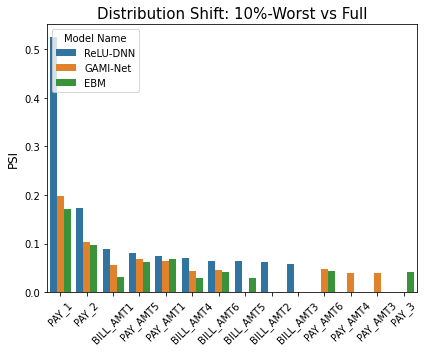

In [37]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_psi', 
                   immu_feature='None', figsize=(6,5))

#Stage 5. Register an arbitrary model ... 

In [38]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(max_depth=7, n_estimators=500)
pipeline = exp.make_pipeline(model=clf, name='LightGBM')
pipeline.fit()
exp.register(pipeline=pipeline)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register LightGBM Done</p>")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

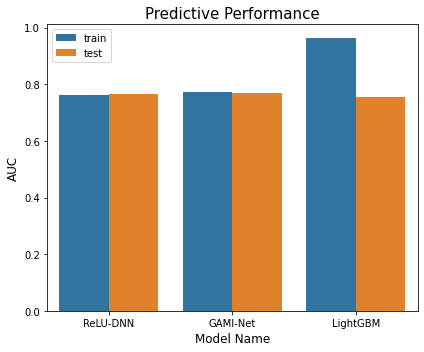

In [39]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'LightGBM'], show='accuracy_auc', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

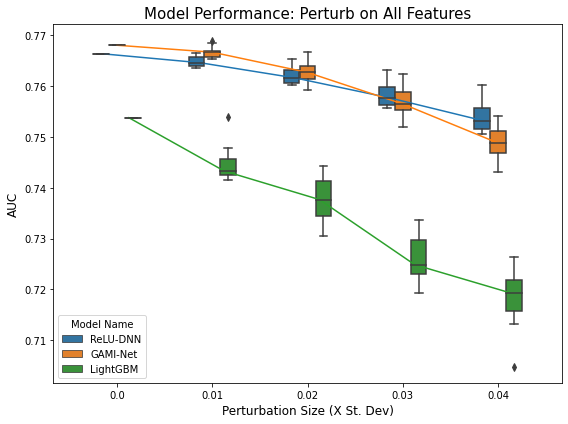

In [40]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'LightGBM'], show='robustness_perf', 
                  perturb_features='All Features', step=0.01, figsize=(8,6))